In [1]:
import pandas as pd
from op_op.load import load_raw_calcium
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = Path(os.environ.get("DATA_DIR")) / "raw"

sns.set_context(
    "notebook",
)

In [3]:
MOUSE = "example-mouse"
SESSIONS = (
    "rm-early",
    "rm-late",
    "rdt-d1",
    "rdt-d2",
    "rdt-d3",
)

### Number of Neurons per Session

In [4]:
def num_neurons(df: pd.DataFrame) -> int:
    num_cols = df.shape[1]
    return num_cols - 1  # subtract 1 for the time column


df_num_neurons = (
    pd.Series({s: num_neurons(load_raw_calcium(DATA_DIR, MOUSE, s)) for s in SESSIONS})
    .to_frame("num_neurons")
    .reset_index()
    .rename(columns={"index": "session"})
)

/tmp/ipykernel_5654/4255257866.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")


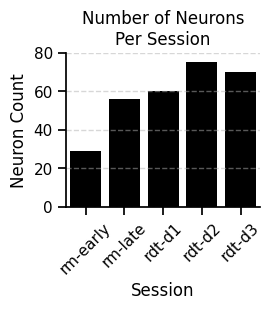

In [5]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.barplot(data=df_num_neurons, x="session", y="num_neurons", color="black", ax=ax)
ax.set_ylabel("Neuron Count")
ax.set_xlabel("Session")
ax.set_title("Number of Neurons\nPer Session")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")

ax.grid(axis="y", linestyle="--", alpha=0.5)

ax.set_ylim(0, 80)

sns.despine(fig=fig)